## import libraries

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import RocCurveDisplay 

import warnings 
warnings.filterwarnings('ignore')

## load dataset

In [2]:
# load random oversampling data
X_ros_train = pd.read_csv('data/ros/X_ros_train.csv')
X_ros_test = pd.read_csv('data/ros/X_ros_test.csv')

y_ros_train = pd.read_csv('data/ros/y_ros_train.csv')
y_ros_test = pd.read_csv('data/ros/y_ros_test.csv')

## train the model

linear svc with random oversampling best model hyperparameters:  

[accuracy=0.7444276333234546, c=1, loss='hinge', penalty='l2']

In [6]:
## best svm trained model hyperparameters ##
C = 1
loss = 'hinge'
penalty = 'l2'

In [8]:
# model creation
model_linear_svc = LinearSVC(C=C, loss=loss, penalty=penalty,  
                                class_weight='balanced', random_state=7)
# model training        
history = model_linear_svc.fit(X_ros_train, y_ros_train)

In [9]:
history

LinearSVC(C=1, class_weight='balanced', loss='hinge', random_state=7)

## evaluate model's performance

In [10]:
# predicting true-labels
y_pred = model_linear_svc.predict(X_ros_test)
# calculating accuracy score
accuracy = accuracy_score(y_true=y_ros_test, y_pred=y_pred)

In [11]:
print(f'{accuracy = }')

accuracy = 0.7444276333234546


<AxesSubplot: >

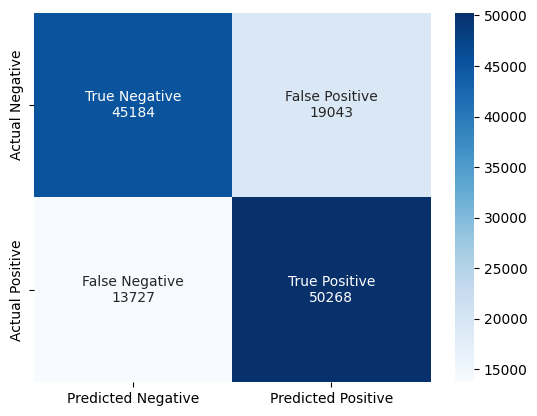

In [12]:
cf_matrix = confusion_matrix(y_true=y_ros_test, y_pred=y_pred)

# preparing the labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten() ]
annotations = [f'{v1}\n{v2}' for v1, v2 in zip(labels, values)]
annotations = np.asarray(annotations).reshape(2, 2)
axxlabels = ['Predicted Negative', 'Predicted Positive']
axylabels = ['Actual Negative', 'Actual Positive']


# plotting the confusion matrix
sns.heatmap(cf_matrix, annot=annotations, 
            fmt='', xticklabels=axxlabels, yticklabels=axylabels, 
            cmap=sns.color_palette('Blues', as_cmap=True))

In [13]:
# calculate accuracy, sensitivity & specifity
tn = cf_matrix.flatten()[0] # true negative
fp = cf_matrix.flatten()[1] # false positive
fn = cf_matrix.flatten()[2] # false negative
tp = cf_matrix.flatten()[3] # true positive

accuracy_score = (tp + tn) / (tn + fp + fn + tp) * 100
tpr = (tp / (tp + fn)) * 100
tnr = (tn / (tn + fp)) * 100

print(f'accuracy score is {accuracy_score}')
print(f'true positive rate is {tpr}')
print(f'true negative rate is {tnr}')

accuracy score is 74.44276333234546
true positive rate is 78.54988670989921
true negative rate is 70.35047565665529


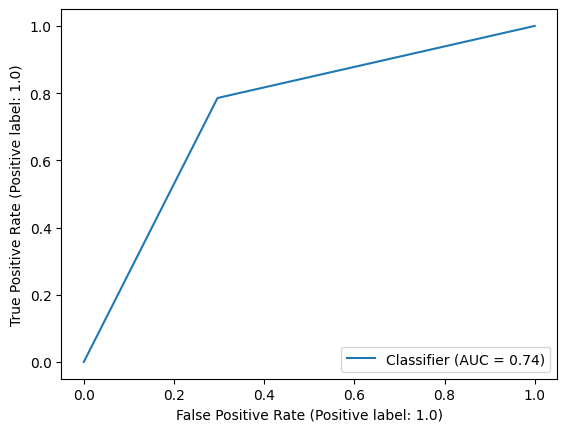

In [14]:
# plot ROC and calculate AUC
RocCurveDisplay.from_predictions(y_true=y_ros_test, y_pred=y_pred, pos_label=1.0)